# Assignment No.2 - Saffron Taylor
## Student Number: 200022090
### GitHub URL: https://github.com/saffytaylor/PY4SA23_Assignment.git


### Python Basics assignment tasks

Task 1: if and else statement with numerical data

In [1]:
num = 16

if num%3 == 0:
    print(num,"is divisible by three")
else:
    print(num,"is not divisible by three")

16 is not divisible by three


Task 2: if and else statement with string data

In [2]:
fruits = ["apple","orange","pear","kiwi","strawberry"]
fruitInput = "lemon"

if fruitInput in fruits:
    print(fruitInput,"is acceptable")
else:
    print(fruitInput,"is not acceptable")

lemon is not acceptable


Task 3: Creating a function to calculate distance using the haversine formula

In [ ]:
import math

pointA = 40.6892° N, 74.0445° W
pointB = 51.4552° N, 0.2968° W

def haversine()


### Pandas and NumPy tasks

Q1: How many trees are of the Quercus or Acer Genus

In [24]:
import numpy as np 
import pandas as pd

genus_df = pd.read_csv("Assignment 2 Data/portland_park_trees.csv", index_col=30)
gen_df = genus_df.query("Genus == 'Quercus' | Genus == 'Acer'")
quercus_df = genus_df.query("Genus == 'Quercus'")
acer_df = genus_df.query("Genus == 'Acer'")
print("There are", len(quercus_df),"trees in the Quercus Genus, and", len(acer_df),"trees in the Acer Genus.")
print("In total there are",len(gen_df),"in both Genera.")

There are 2089 trees in the Quercus Genus, and 3586 trees in the Acer Genus.
In total there are 5675 in both Genera.


Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [29]:
gen_df.query("DBH > 50")

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Family,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
Genus,,,,,,,,,,,,,,,,,,,,,
Acer,128,953,2017/05/24,ACMA,50.5,Fair,90.0,83.0,84.0,staff,...,Sapindaceae,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
Acer,153,1754,2017/05/24,ACMA,50.5,Fair,85.0,51.0,60.0,staff,...,Sapindaceae,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
Acer,155,1756,2017/05/24,ACMA,52.7,Fair,94.0,73.0,59.0,staff,...,Sapindaceae,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
Acer,163,2150,2017/05/24,ACMA,56.3,Fair,70.0,57.0,72.0,staff,...,Sapindaceae,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
Acer,594,13044,2017/06/29,ACMA,50.9,Fair,90.0,59.0,64.0,volunteer,...,Sapindaceae,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Acer,23958,684418,2019/09/23,ACMA,59.5,Poor,77.0,40.0,32.0,staff,...,Sapindaceae,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
Quercus,24272,690856,2019/09/25,QUGA,69.9,Good,101.0,83.0,117.0,staff,...,Fagaceae,Oregon white oak,Quercus garryana,BD,L,Yes,Yes - nuts,NaN,"North America - southern British Columbia, Can...","Look for galls on the underside of leaves, whi..."
Quercus,24462,695648,2019/09/27,QUGA,59.0,Fair,94.0,97.0,89.0,staff,...,Fagaceae,Oregon white oak,Quercus garryana,BD,L,Yes,Yes - nuts,NaN,"North America - southern British Columbia, Can...","Look for galls on the underside of leaves, whi..."


Q4: How many different species of trees are recorded in the Acer genus?

In [30]:
acer_df["Species"].nunique()

20

Q5: The world_cities.csv is a file that contains cities, countries, population, coordinates (geographic) and a Boolean attribute that defines if the city is the capital city or not. Read this file as a Pandas dataframe and create the required scripts to:
* Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.

* Print the result.
* Make sure you write the scripts in different code cells where you describe the process.

In [62]:
cities_df = pd.read_csv("Assignment 2 Data/world_cities.csv")
# reading the world_cities.csv file into python
cities_df["pop_M"] = (cities_df["pop"]/1000000)
# creating a new column called "pop_M" and assigning this column the value of "pop" divided by 1million, to give us the population in millions

* Remove the original "pop" column.

In [65]:
cities_update = cities_df.drop(["pop"], axis=1)
# using the drop command to remove the pop column

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456
...,...,...,...,...,...,...
43640,az-Zubayr,Iraq,30.39,47.71,0,0.124611
43641,az-Zulfi,Saudi Arabia,26.30,44.80,0,0.054070
43642,az-Zuwaytinah,Libya,30.95,20.12,0,0.021984
43643,s-Gravenhage,Netherlands,52.07,4.30,0,0.479525


* Choose/subset a city that starts with the same letter as your first name (for example,
"Mexico City" if your first name is Michael).

In [67]:
s_cities = cities_update[cities_update.city.str.startswith("S")]
# subsets the data to only include cities that start with the letter s
s_cities.head(1)
# then prints the first row of this subset to give us 1 city beginning with the letter S

,city,country,lat,lon,capital,pop_M
27919,San Antonio de Pale,Equatorial Guinea,-1.41,5.61,0,0.004279


* Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.

In [73]:
(cities_update.query("country == 'Equatorial Guinea'")
 .sort_values(by="pop_M", ascending=False)
 .head(5))

,city,country,lat,lon,capital,pop_M
3568,Bata,Equatorial Guinea,1.87,9.76,0,0.184393
22293,Malabo,Equatorial Guinea,3.74,8.79,1,0.161409
10114,Ebebiyin,Equatorial Guinea,2.15,11.33,0,0.026468
338,Aconibe,Equatorial Guinea,1.30,10.93,0,0.011893
1504,Anisoc,Equatorial Guinea,1.85,10.77,0,0.010980


### Python Data Visualisation 

Using the same dataset portland_park_trees.csv, create using seaborn, pandas or matplotlib libraries the following charts:

* **Graph 1**: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis.

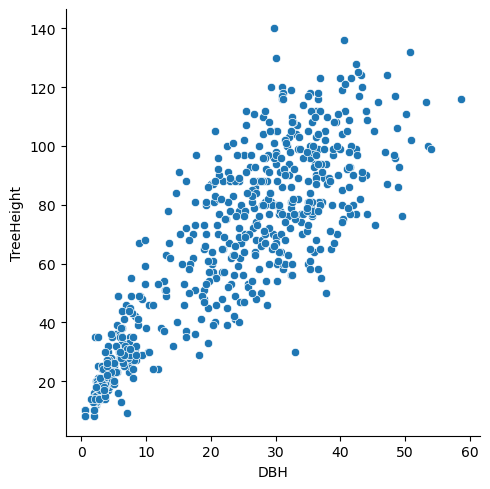

In [77]:
# starting off by importing seaborn
import seaborn as sns

# creating a subset of just trees in the Ulmus genus
ulmus_df = genus_df.query("Genus == 'Ulmus'")

sns.relplot(x="DBH", y="TreeHeight", data=ulmus_df)

* **Graph 2**: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

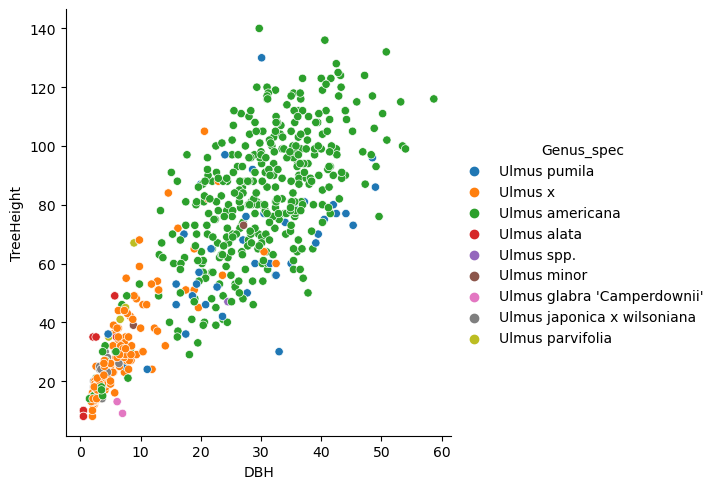

In [79]:
sns.relplot(x="DBH", y="TreeHeight", hue="Genus_spec", data=ulmus_df)

* **Graph 3**: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

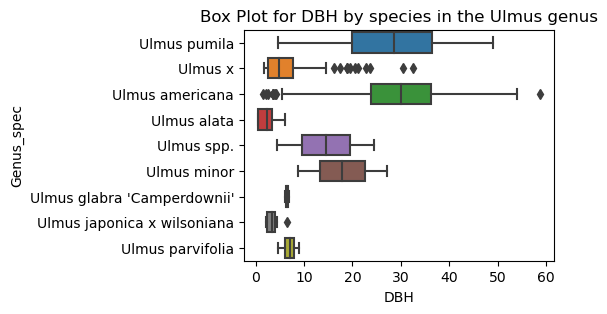

In [85]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#ulmus = sns.load_dataset('ulmus_df')

plt.figure(figsize=(4,3))
sns.boxplot(data=ulmus_df, x='DBH', y='Genus_spec')
plt.title('Box Plot for DBH by species in the Ulmus genus')
plt.show()